In [13]:
import heapq
iPair = tuple
from graphviz import Digraph

In [17]:
class Graph:
    def __init__(self, V: int): 
        self.V = V
        self.adj = [[] for _ in range(V)]
        
    def make_graph(self):
        dot = Digraph(comment='Graph', graph_attr={'rankdir': 'LR'})
        
        for u in range(self.V):
            for v, w in self.adj[u]:
                dot.edge(str(u), str(v), label=str(w)+"    ")
        
        return dot

    def addEdge(self, u: int, v: int, w: int):
        self.adj[u].append((v, w))
        self.adj[v].append((u, w))
    
    def _reconstruct_path(self, prev, target):
        path = []
        while target is not None:
            path.append(target)
            target = prev[target]
        path.reverse()
        return path
    
    def shortestPath(self, src: int):
        pq = []
        heapq.heappush(pq, (0, src))
        dist = [float('inf')] * self.V
        prev = [None] * self.V  
        dist[src] = 0
        
        while pq:
            current_dist, u = heapq.heappop(pq)
            
            if current_dist > dist[u]:
                continue
            
            for v, weight in self.adj[u]:
                if dist[v] > dist[u] + weight:
                    dist[v] = dist[u] + weight
                    prev[v] = u
                    heapq.heappush(pq, (dist[v], v))

        for i in range(self.V):
            path = self._reconstruct_path(prev, i)
            print(f"Shortest path to vertex {i}: {' -> '.join(map(str, path))} with cost {dist[i]}")

Shortest path to vertex 0: 0 with cost 0
Shortest path to vertex 1: 0 -> 4 -> 1 with cost 7
Shortest path to vertex 2: 0 -> 4 -> 1 -> 2 with cost 9
Shortest path to vertex 3: 0 -> 4 -> 3 with cost 10
Shortest path to vertex 4: 0 -> 4 with cost 3


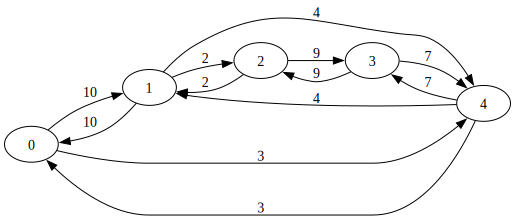

In [18]:
g = Graph(5)
g.addEdge(0, 1, 10)
g.addEdge(0, 4, 3)
g.addEdge(1, 2, 2)
g.addEdge(1, 4, 4)
g.addEdge(2, 3, 9)
g.addEdge(3, 4, 7)
g.shortestPath(0)
g.make_graph()